#Import Packages

In [ ]:
#Importing Libraries
import numpy as np 
import pandas as pd
 
from tabulate import tabulate      #For displaying results
 
#Graphical libaray for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#EDA and Data Pre-processing

In [ ]:
#Reading data file 
data = pd.read_csv(r"C:\Users\Mextsol\Downloads\dataset.csv")

#Correcting some erroneous data entries
data['Age Group'] = data['Age Group'].str.replace('20-Oct','10-20')
data['Age Group'] = data['Age Group'].str.replace('20 - 30','20-30')
data['Age Group'] = data['Age Group'].str.replace('50  - 60','50-60')
data['Age Group'] = data['Age Group'].str.replace('10=20','10-20')
data['Age Group'] = data['Age Group'].str.replace('40 - 50','40-50')
data['Age Group'] = data['Age Group'].str.replace('30 - 40','30-40')
data['Age Group'] = data['Age Group'].str.replace('60 - 70','60-70')
data['Age Group'] = data['Age Group'].str.replace('10=20','10-20')


# Delete unnecessary features from dataset
data.drop('Name', axis=1, inplace=True)
data.drop('Problem while interacting with Interface', axis=1, inplace=True)

In [ ]:
#Barchart function
def bar_chart(feature):
    Visually_Disabled = data[data['y']==1][feature].value_counts()
    Visually_Healthy = data[data['y']==0][feature].value_counts()
    df = pd.DataFrame([Visually_Disabled,Visually_Healthy])
    df.index = ['Visually_Disabled','Visually_Healthy']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

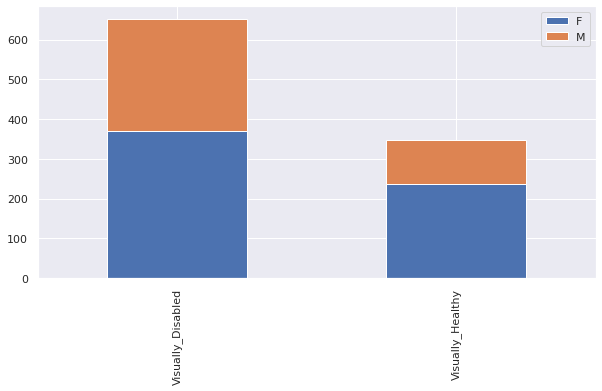

In [ ]:
#Data Distribution based on Gender
bar_chart('Gender')

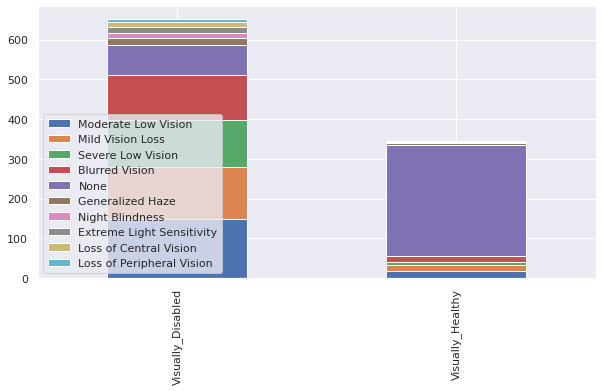

In [ ]:
#Visual Disability
bar_chart('Visual Disability')

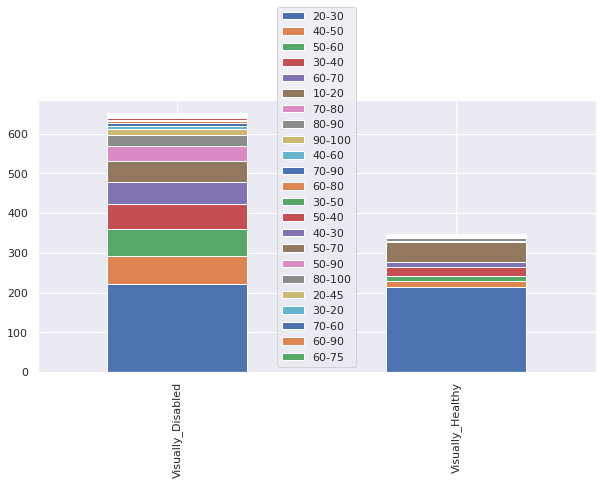

In [ ]:
#Data Visualization based on Age Group
bar_chart('Age Group')

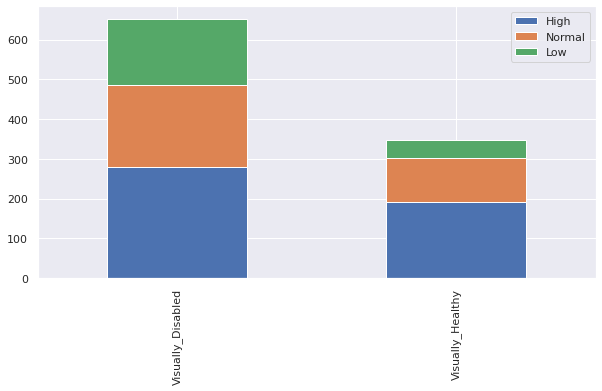

In [ ]:
bar_chart('Interface Usage ')

In [ ]:
#Converting categorical data columns to numeric form

#Single label encoding
cleanup_nums = {"Interface Usage ":     {"Low": 0, "Normal": 1, "High":2},
                "Visual Disability":    {"None":0, "Generalized Haze":1, "Blurred Vision":2, "Moderate Low Vision":3, "Mild Vision Loss":4, "Extreme Light Sensitivity":5, "Night Blindness":6, "Loss of Peripheral Vision":7, "Loss of Central Vision":8,"Severe Low Vision":9},
                "Age Group": {"10-20":0,"20-30":1,"30-20":1,"30-40":2,"40-30":2,"20-45":2,"30-50":2,"40-50":3,"50-40":3,"40-60":3,"50-60":4,"50-90":4,"50-70":4,"60-70":5,"60-90":5,"70-60":5,"60-75":5,"60-80":5,"70-80":6,"70-90":6,"80-90":7,"80-100":7,"90-100":8}
                }
data = data.replace(cleanup_nums)

#One Hot Encoding the Gender column
data = pd.get_dummies(data, columns=["Gender"])


In [ ]:
#Remove null values form the data
data = data.dropna()
#Get the label from the dataset
label=data.pop('y')
#Get all the features from the data
X = data.values

In [ ]:
#Importing libraries for data preprocessing and splitting
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Normalizing feature values
X = preprocessing.StandardScaler().fit_transform(X)

#Splitting the dataset into training  and test sets
X_train, X_test, y_train, y_test = train_test_split( X, label, test_size=0.3, random_state=40)

##K Nearest Neighbor Algorithm

In [ ]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#Creating classifier object
knnmodel=KNeighborsClassifier(n_neighbors=4)

#Training the classifier
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
#Testing Algorithm's Accuracy
from sklearn.metrics import accuracy_score

#Prediction on test data
y_predict=knnmodel.predict(X_test)

#Calculating Accuracy
knn_acc=accuracy_score(y_test,y_predict)

knn_table = [['Algorithm', 'Accuracy'], ['KNN', str(knn_acc)]]

print(tabulate(knn_table, headers='firstrow', tablefmt='grid'))

+-------------+------------+
| Algorithm   |   Accuracy |
+=============+============+
| KNN         |   0.823333 |
+-------------+------------+


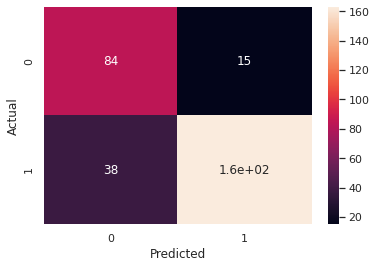

In [ ]:
#Plotting classifier's Confusion Matrix

#Creating the dataframe
knn_conf = {'y_Actual':    y_test,
        'y_Predicted': y_predict
        }
df = pd.DataFrame(knn_conf, columns=['y_Actual','y_Predicted'])

#Obtaining Confusion Matrix
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#Plotting
sns.heatmap(confusion_matrix, annot=True)
plt.show()

#Logistic Regression Algorithm

In [ ]:
#Impor classifier from scikit learn
from sklearn.linear_model import LogisticRegression

#Classifier Object
Log_Reg_Model = LogisticRegression(random_state=0)

#Training
Log_Reg_Model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Accuracy
y_predict = Log_Reg_Model.predict(X_test)

LR_acc=accuracy_score(y_test,y_predict)

LR_table = [['Algorithm', 'Accuracy'], ['Logistic Regression', str(LR_acc)]]

print(tabulate(LR_table, headers='firstrow', tablefmt='grid'))

+---------------------+------------+
| Algorithm           |   Accuracy |
+=====================+============+
| Logistic Regression |   0.873333 |
+---------------------+------------+


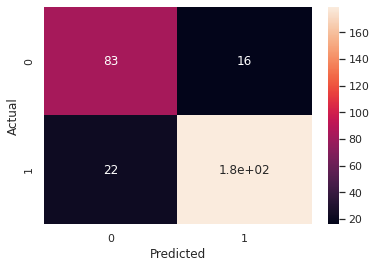

In [ ]:
#Confusion Matrix

LR_conf = {'y_Actual':    y_test,
        'y_Predicted': y_predict
        }
df = pd.DataFrame(LR_conf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#Plotting
sns.heatmap(confusion_matrix, annot=True)
plt.show()

#Support Vector Machine Algorithm

In [ ]:
#Import classifier
from sklearn import svm

#Classifier Object
SVM_Model = svm.SVC()

#Training
SVM_Model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Accuracy
y_predict = SVM_Model.predict(X_test)

svm_acc=accuracy_score(y_test,y_predict)

svm_table = [['Algorithm', 'Accuracy'], ['SVM', str(svm_acc)]]

print(tabulate(svm_table, headers='firstrow', tablefmt='grid'))

+-------------+------------+
| Algorithm   |   Accuracy |
+=============+============+
| SVM         |   0.873333 |
+-------------+------------+


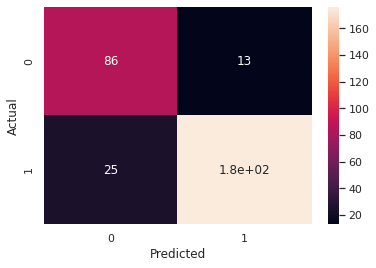

In [ ]:
#Confusion Matrix
SVM_conf = {'y_Actual':    y_test,
        'y_Predicted': y_predict
        }
df = pd.DataFrame(SVM_conf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#Naive Bayes Algorithm

In [ ]:
#Import Classifier
from sklearn.naive_bayes import GaussianNB

#Classifier Object
GNB_Model = GaussianNB()

#Training the model
GNB_Model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Accuracy
y_predict = GNB_Model.predict(X_test)

NB_acc=accuracy_score(y_test,y_predict)

nb_table = [['Algorithm', 'Accuracy'], ['Naive Bayes', str(NB_acc)]]

print(tabulate(nb_table, headers='firstrow', tablefmt='grid'))

+-------------+------------+
| Algorithm   |   Accuracy |
+=============+============+
| Naive Bayes |       0.74 |
+-------------+------------+


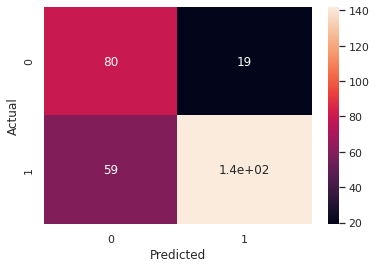

In [ ]:
#Confusion Matrix
GNB_conf = {'y_Actual':    y_test,
        'y_Predicted': y_predict
        }
df = pd.DataFrame(GNB_conf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#Comparing Accuracy

In [ ]:
table = [['Algorithm', 'Accuracy'], ['KNN', str(knn_acc)], ['Log Reg', str(LR_acc)], ['SVM', str(svm_acc)],['Naive Bayes', str(NB_acc)]]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+-------------+------------+
| Algorithm   |   Accuracy |
+=============+============+
| KNN         |   0.823333 |
+-------------+------------+
| Log Reg     |   0.873333 |
+-------------+------------+
| SVM         |   0.873333 |
+-------------+------------+
| Naive Bayes |   0.74     |
+-------------+------------+


Text(0, 0.5, 'Accuracy')

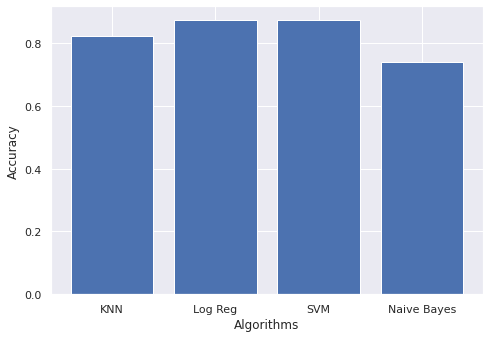

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
Algos = ['KNN','Log Reg','SVM','Naive Bayes']
Accs = [knn_acc,LR_acc,svm_acc,NB_acc]
ax.bar(Algos,Accs);
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')